# ENCUESTA DE CURSADA
## Segundo Cuatrimestre de 2018
### Departamento de Computación FIUBA

In [36]:
import numpy as np 
import pandas as pd
# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys  
#reload(sys)  
#sys.setdefaultencoding('utf8')

In [37]:
comp = pd.read_csv('encuesta5.csv')
comp.sample(1)

Timestamp                                  Curso  \
766  2018/12/17 10:18:56 PM GMT-3  Algoritmos y Programación 3 - Fontela   

    Opinión General Sobre el Curso ¿Aprobó la Cursada?  \
766                          Bueno                  Sí   

    ¿Cómo te Resultaron los Temas de la Materia?  \
766                                 Interesantes   

    ¿Los Temas de la Materia Están Actualizados?  \
766                                           Sí   

    Nivel de las Clases Teóricas del Curso  \
766                             Muy Buenas   

    Nivel de las Clases Prácticas del Curso Dificultad del Curso  \
766                               Regulares               Normal   

    Dificultad del TP                         Comentarios Sobre el Curso  
766           Dificil  Los auxiliares de la materia son lo peor que v...

#### Total de Encuestas Procesadas

In [38]:
print(len(comp))

844


In [39]:
# This not used :)
filter = (comp["Comentarios Sobre el Curso"].notnull())
opinions = comp.loc[filter,['Curso','Comentarios Sobre el Curso']].sort_values('Curso')

In [40]:
def map_answers(comp):
    map_sino = {'Sí':5,'No':1}
    map_opinion = {'Excelente':5,'Muy Bueno':4, 'Bueno':3,'Regular':2,'Malo':1}
    map_temas = {'Interesantes':4,'Muy Interesantes':5, 'Poco Interesantes':2,'Nada Interesantes':1}
    map_clases_teoricas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No hay clases teóricas':np.NaN}
    map_dificultad_tp = {'Muy dificil':5,'Dificil':4,'Normal':3,'Fácil':2,'Muy Fácil':1, 'No hay TP': np.NaN}
    map_dificultad = {'Muy Dificil':5,'Dificil':4,'Normal':3,'Facil':2,'Muy Facil':1, 'No hay TP': np.NaN}
    map_clases_practicas = {'Excelentes':5,'Muy Buenas':4, 'Buenas':3,'Regulares':2,'Malas':1,'No Hay Clases Prácticas':np.NaN}
    comp.replace({"¿Aprobó la Cursada?": map_sino},inplace=True)
    comp.replace({"¿Los Temas de la Materia Están Actualizados?": map_sino},inplace=True)
    comp.replace({"Opinión General Sobre el Curso": map_opinion},inplace=True)
    comp.replace({"Nivel de las Clases Teóricas del Curso": map_clases_teoricas},inplace=True)
    comp.replace({"Nivel de las Clases Prácticas del Curso": map_clases_practicas},inplace=True)
    comp.replace({"Dificultad del Curso": map_dificultad},inplace=True)
    comp.replace({"Dificultad del TP": map_dificultad_tp},inplace=True)
    comp.replace({"¿Cómo te Resultaron los Temas de la Materia?": map_temas},inplace=True)
    return comp

In [41]:
comp = map_answers(comp)

## Histograma de calificaciones para la opinión general sobre el curso


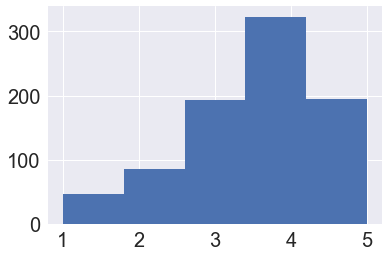

In [42]:
comp['Opinión General Sobre el Curso'].hist(bins=5);

In [43]:
grouped = comp.groupby('Curso')
num_votes = grouped.agg('size')
g_mean = grouped.mean()
g_mean['votes']=num_votes

## Varianza de la Opinión por Curso
Este gráfico muestra la variabilidad de la pregunta "Opinión General Sobre el Curso", a menor valor mas consistentes los resultados de la encuesta. Los valores mayores muestran disparidad de resultados en cuanto a la opinión general sobre el curso.

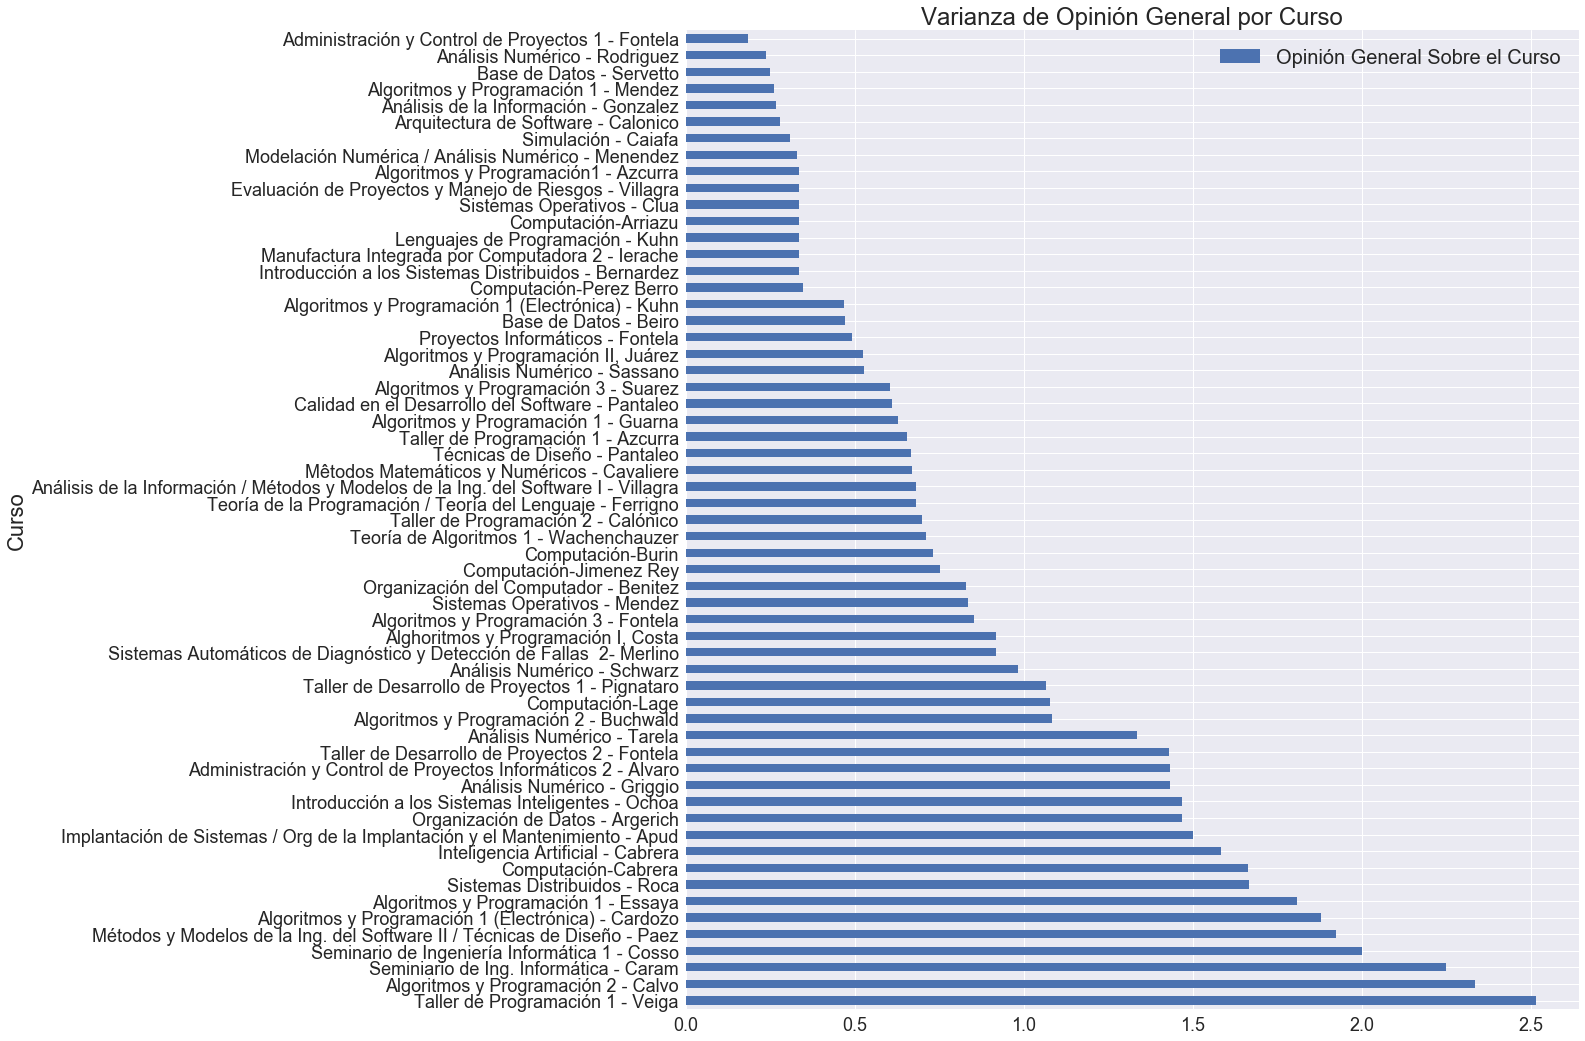

In [44]:
g_var = grouped.var()
gop = g_var.loc[g_var['Opinión General Sobre el Curso']>0,['Opinión General Sobre el Curso']].\
    sort_values(by='Opinión General Sobre el Curso',ascending=False).\
    plot(kind='barh',figsize=(16,18),title='Varianza de Opinión General por Curso',fontsize=18);

## Cantidad de Encuestados por Curso
Cantidad de encuestas completadas por cada Curso.

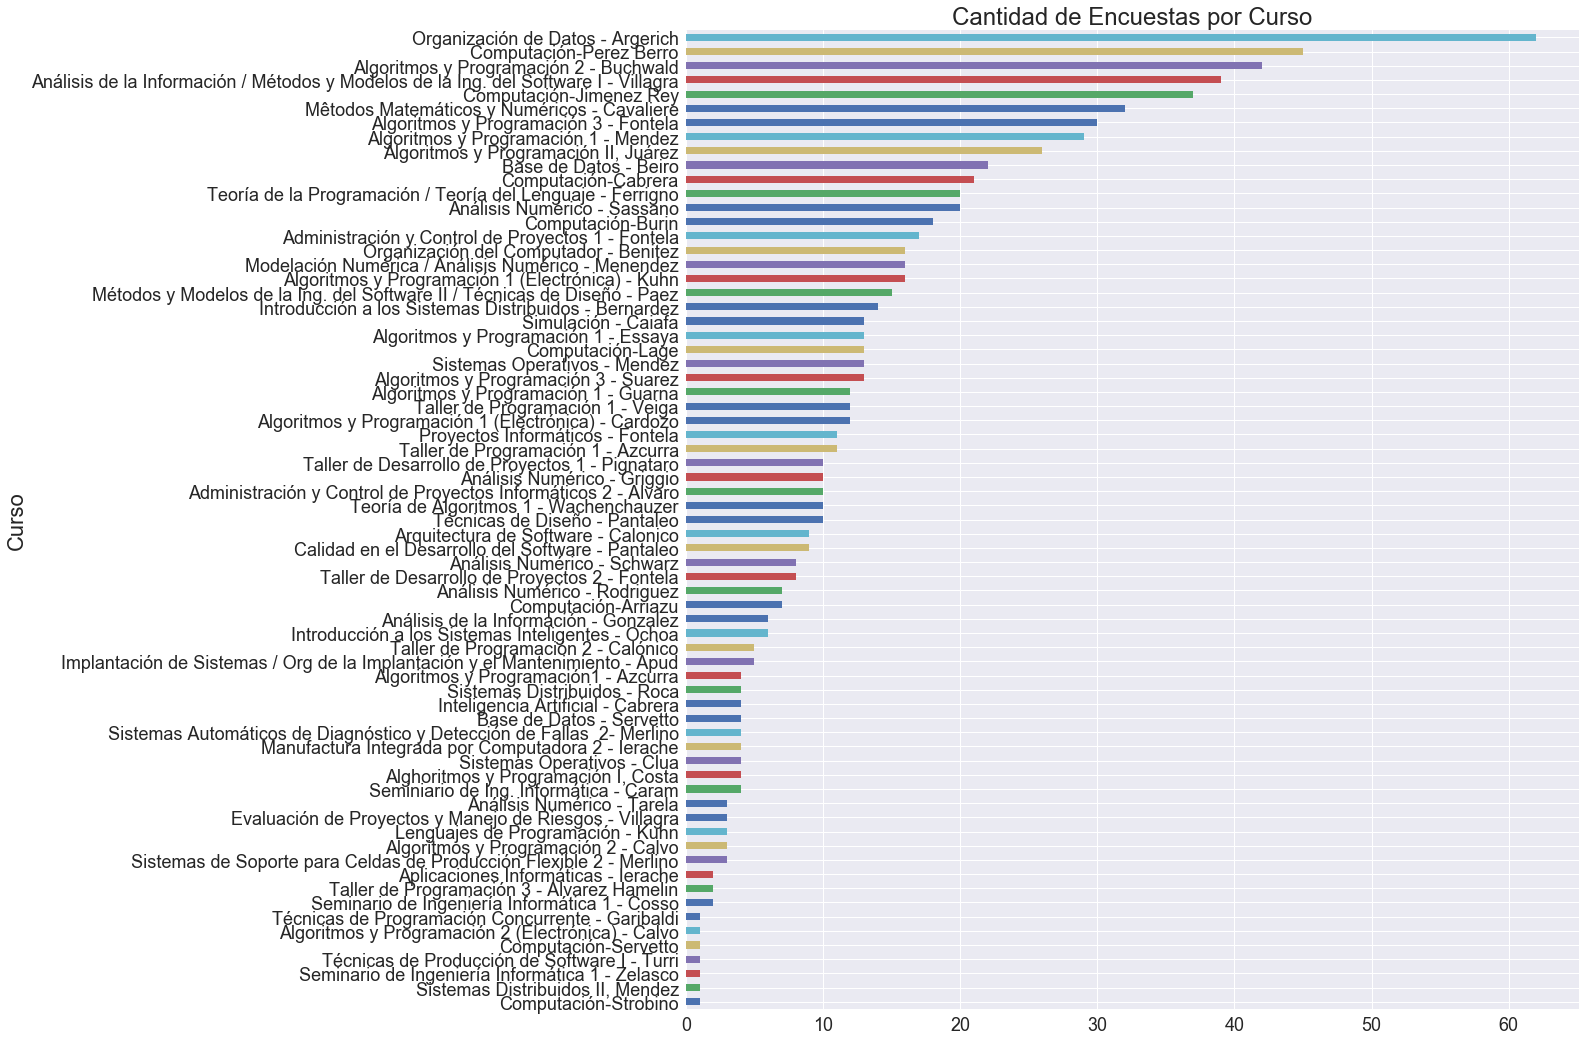

In [45]:
g_mean['votes'].sort_values(ascending=True).plot(kind='barh',figsize=(16,18),title='Cantidad de Encuestas por Curso',fontsize=18);

In [46]:
# Quedarnos unicamente con los cursos que tienen 3 o mas encuestas
g_mean = g_mean.loc[g_mean['votes']>2,:]
lista_cursos = g_mean.index.tolist()

## Heatmap de Evaluación de Cursos (5 o mas respuestas)
Esta matriz muestra el promedio de calificaciones para cada pregunta de la encuesta para los cursos que tienen 5 o mas encuestas. Orden alfabético por curso.

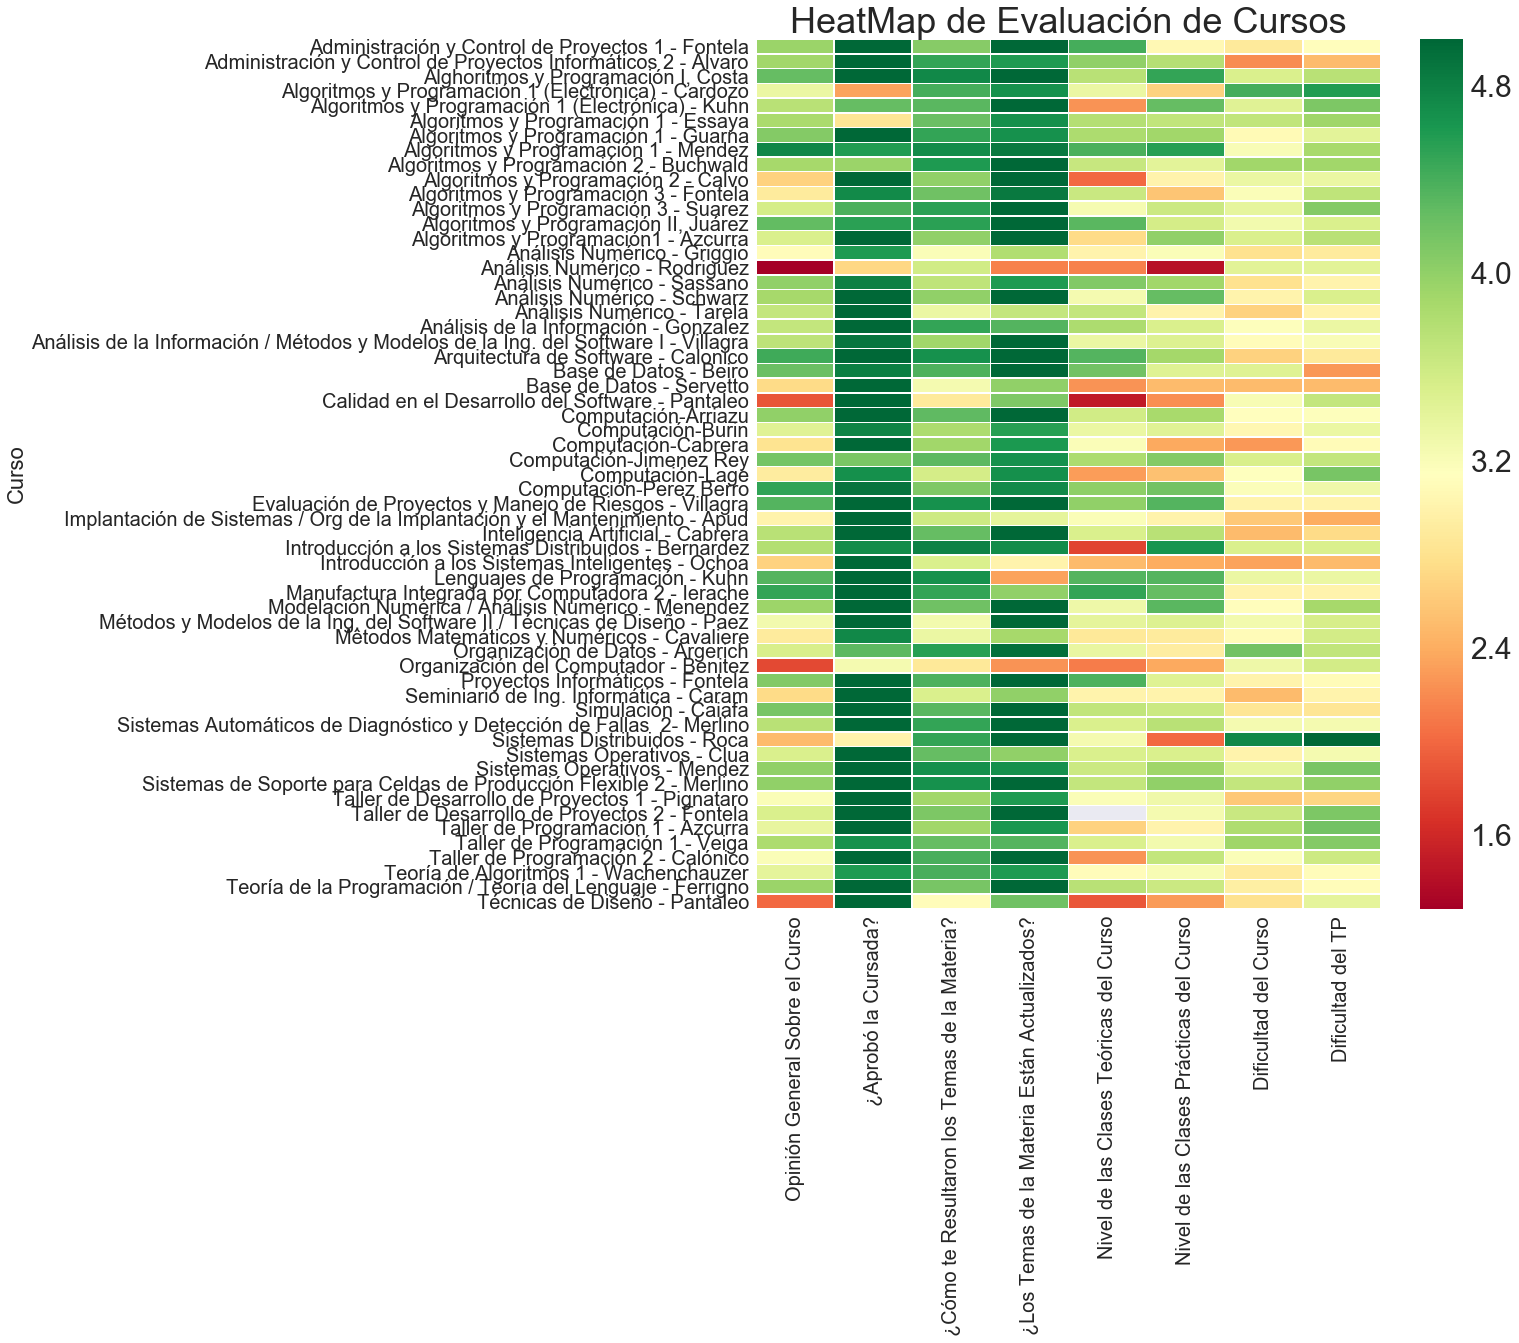

In [47]:
g_mean2 = g_mean.drop('votes',1)
fig, ax = plt.subplots(figsize=(14,16))        
sns.set(font_scale=3.0)
sns.heatmap(g_mean2, annot=False, linewidths=.5,cmap='RdYlGn',  ax=ax);
plt.title('HeatMap de Evaluación de Cursos');

## Histograma del Promedio de Opiniones de los Cursos (un promedio x curso)
Por cada curso se calcula el promedio de la pregunta "Opinión general sobre el curso" y luego se hace un histograma de los resultados. El gráfico solo incluye aquellos cursos con 5 o mas encuestas.

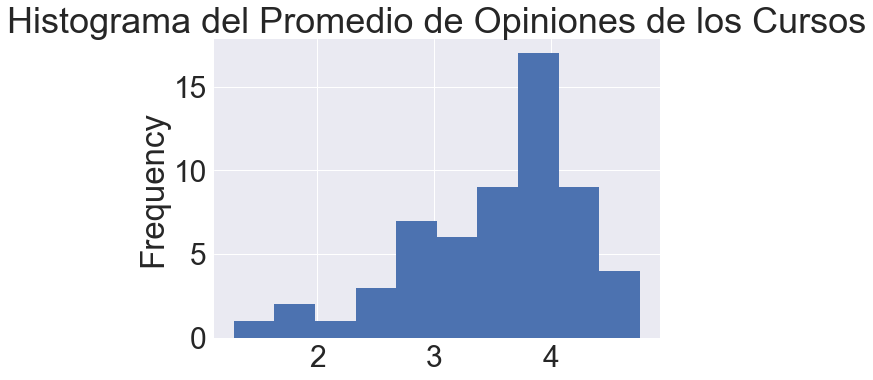

In [48]:
g_mean['Opinión General Sobre el Curso'].plot(kind='hist',bins=10,title='Histograma del Promedio de Opiniones de los Cursos');

## Opinion General Sobre el Curso

In [49]:
CUTLIST = [0,2,3,3.5,4.5,5]
LABELSLIST = ['r','orange','y','g', 'b']

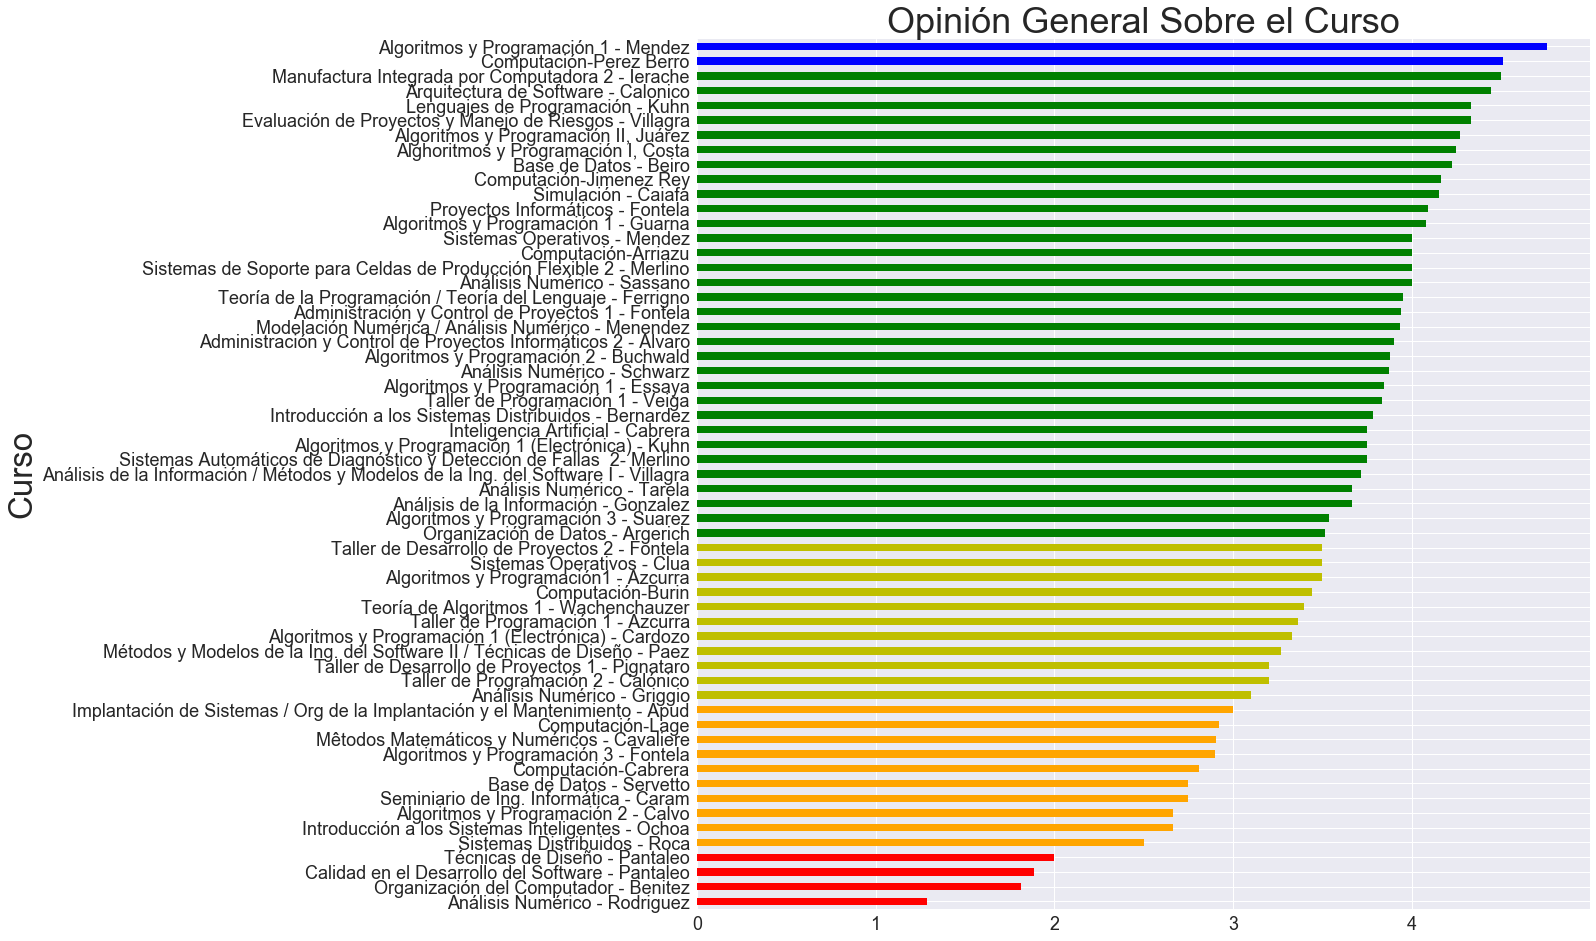

In [50]:
VARIABLE = 'Opinión General Sobre el Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas de la Materia son Interesantes?

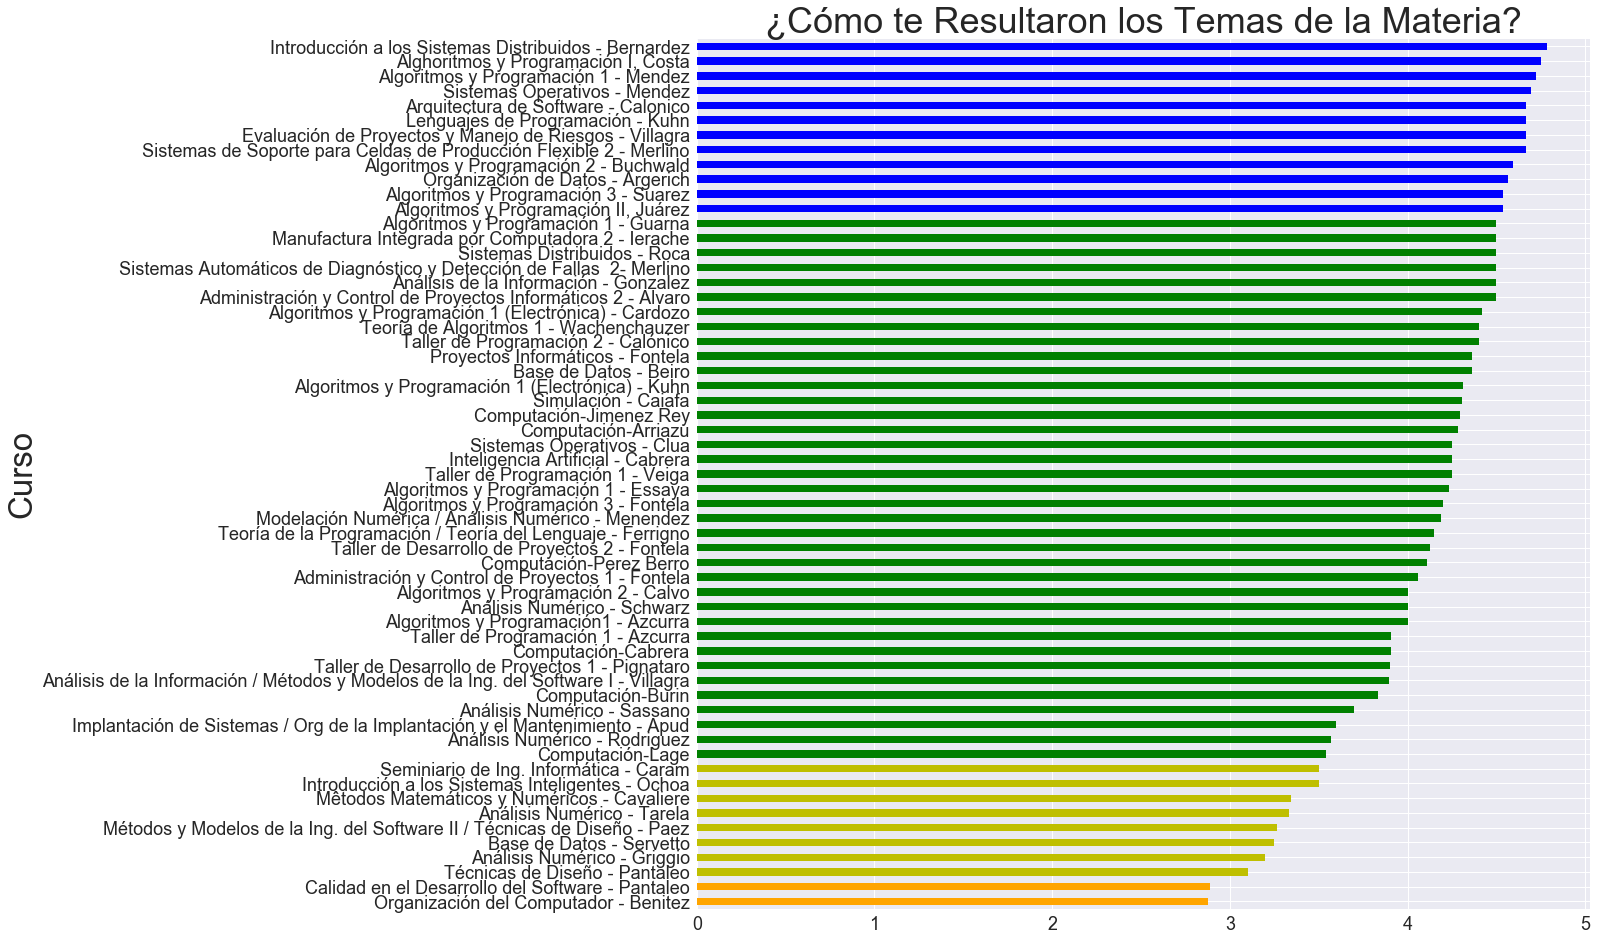

In [51]:
VARIABLE = '¿Cómo te Resultaron los Temas de la Materia?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors= pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## ¿Los Temas Están Actualizados?

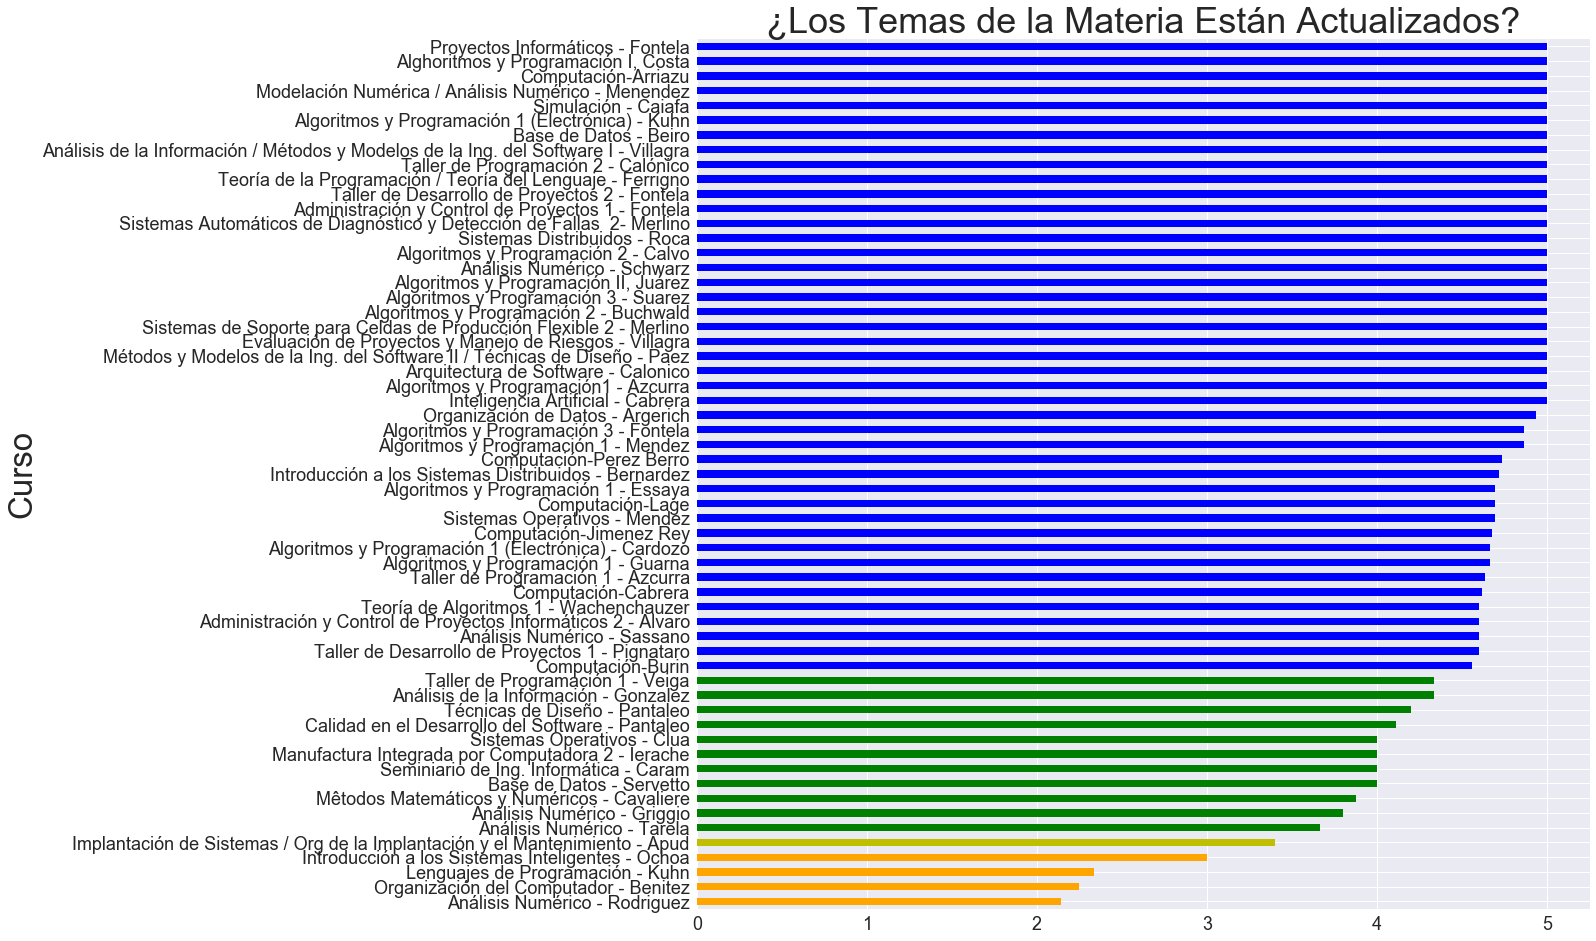

In [52]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True)
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Teóricas

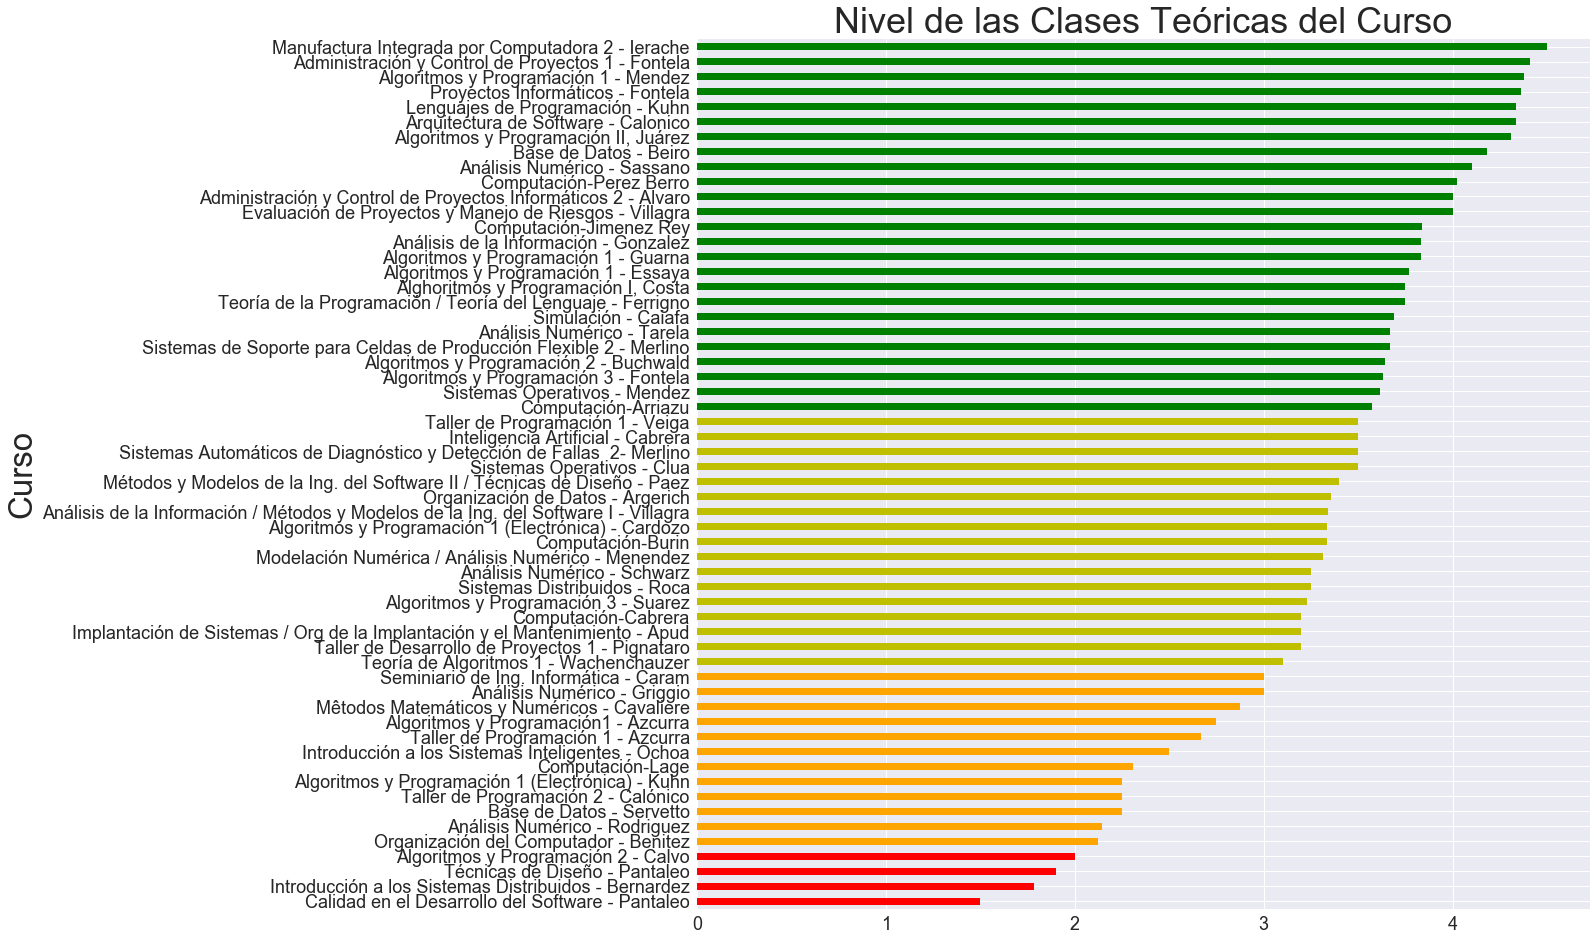

In [53]:
VARIABLE = 'Nivel de las Clases Teóricas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

## Nivel de las Clases Prácticas del Curso

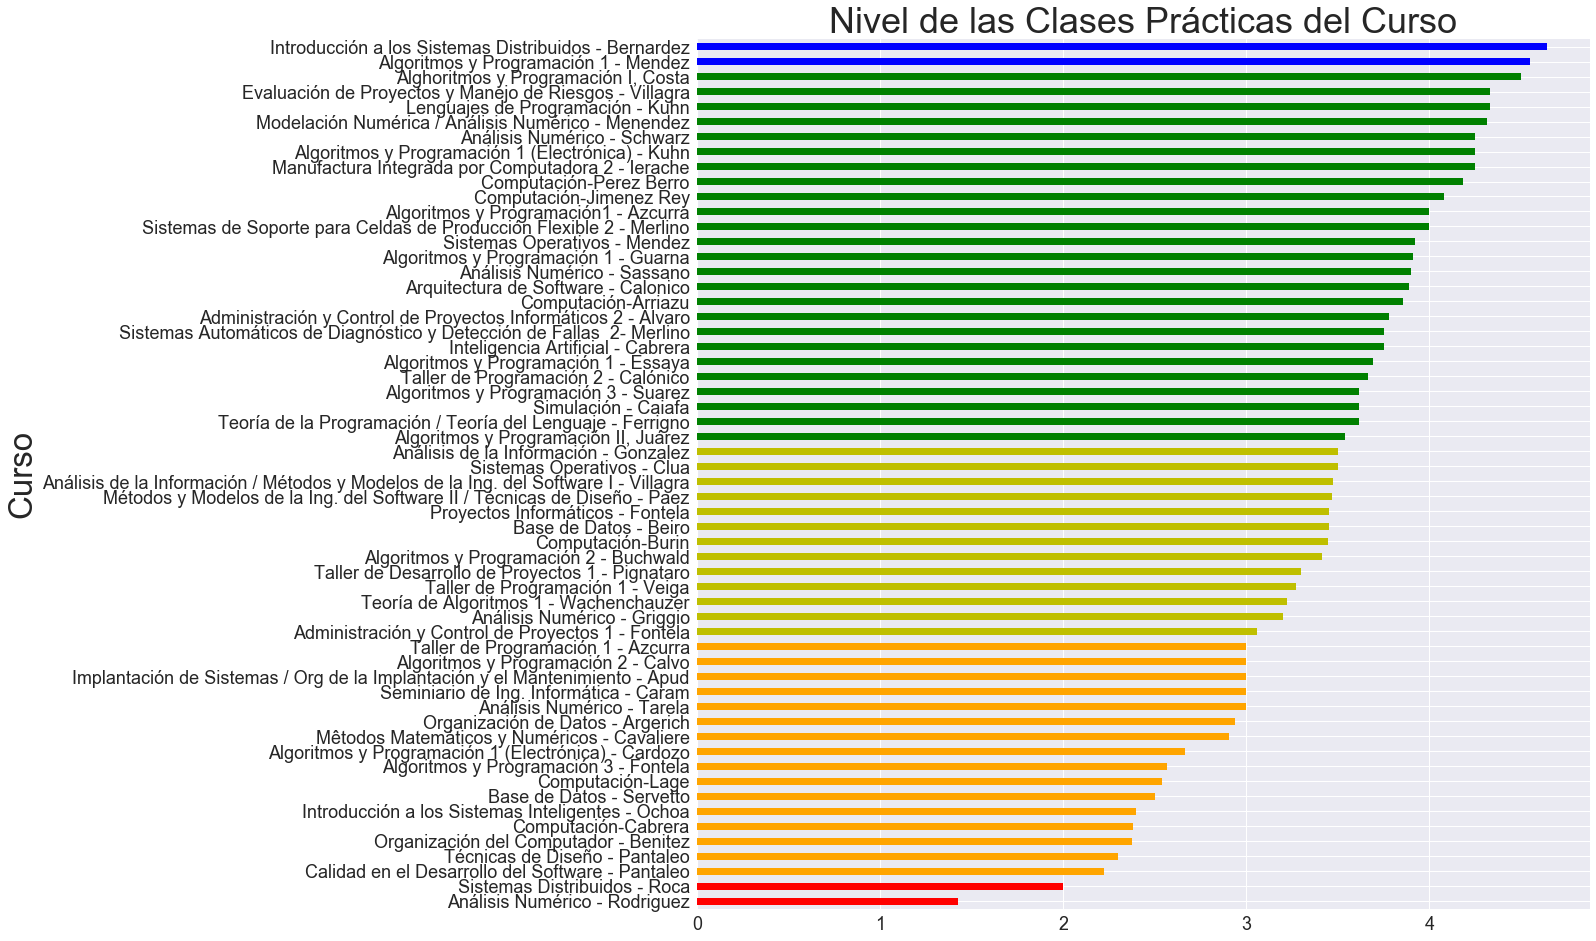

In [54]:
VARIABLE = 'Nivel de las Clases Prácticas del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Nivel de las Clases (Promedio de Teóricas y Prácticas)

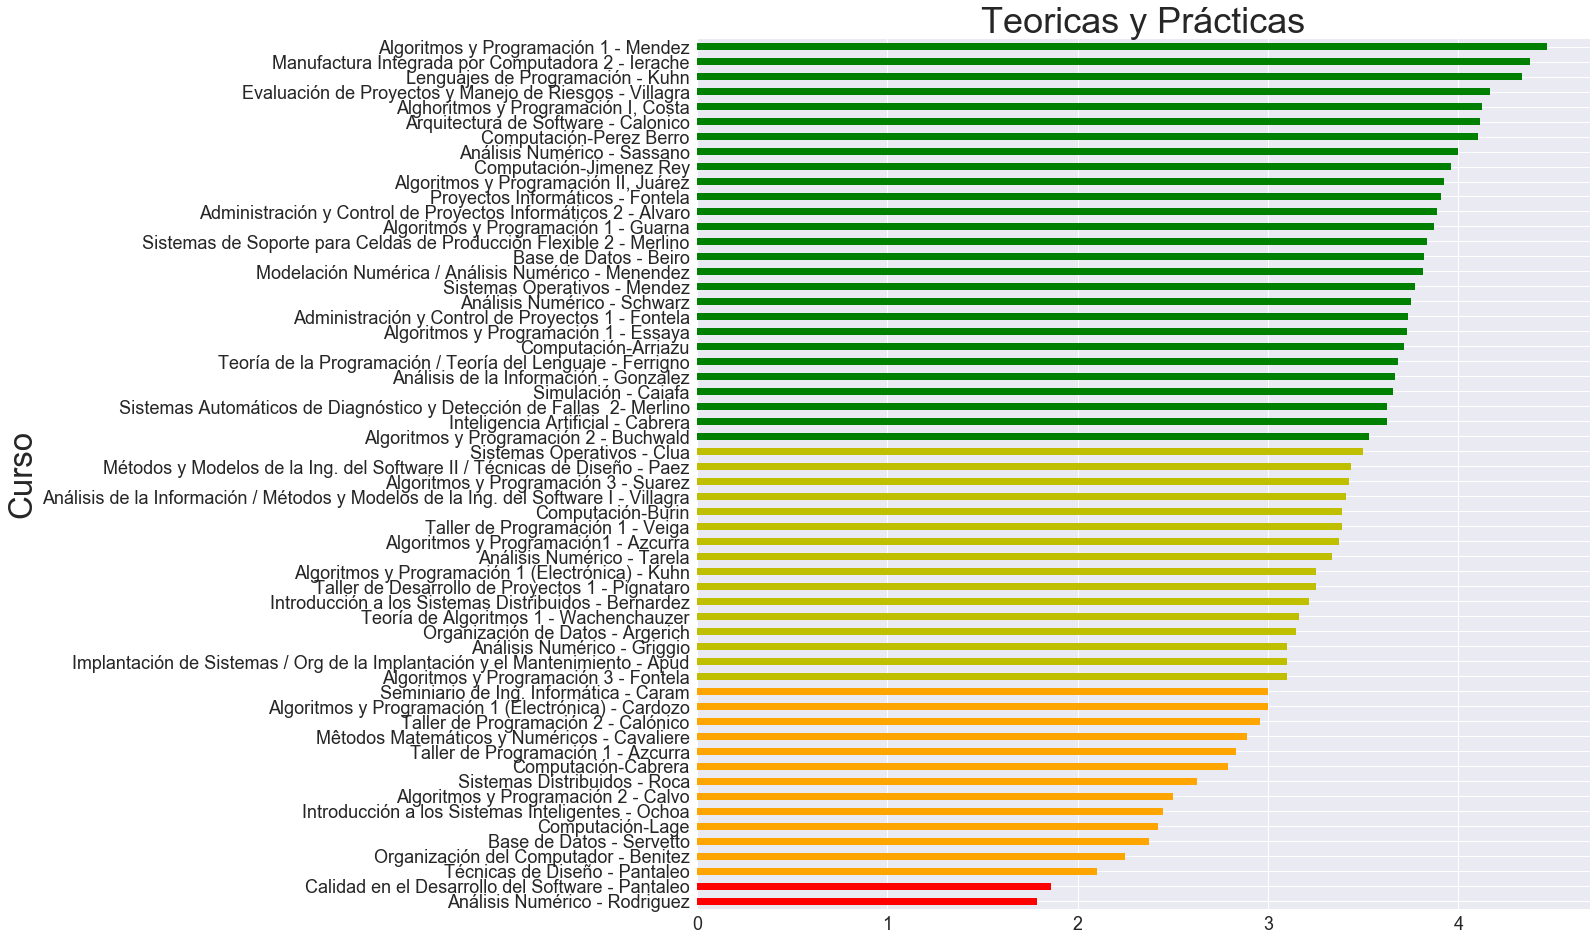

In [55]:
g_mean['Teoricas y Prácticas'] = (g_mean['Nivel de las Clases Prácticas del Curso'] + g_mean['Nivel de las Clases Teóricas del Curso'])/2
VARIABLE = 'Teoricas y Prácticas'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Dificultad del Curso

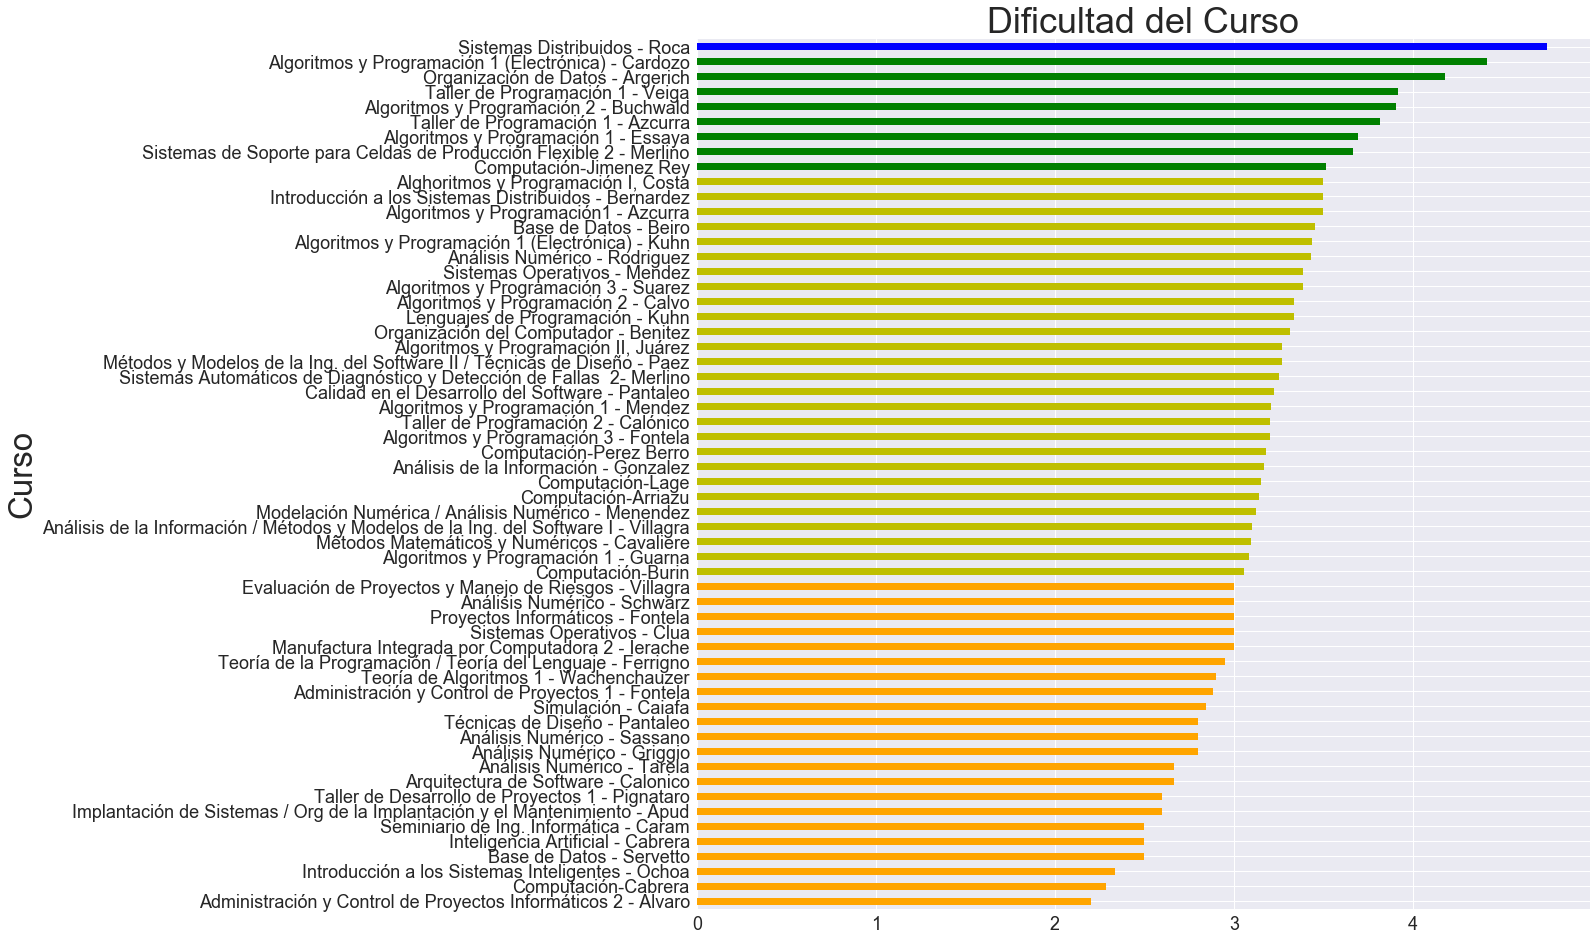

In [56]:
VARIABLE = 'Dificultad del Curso'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=18,title=VARIABLE);

# Relación entre Opinión Sobre el Curso y Dificultad

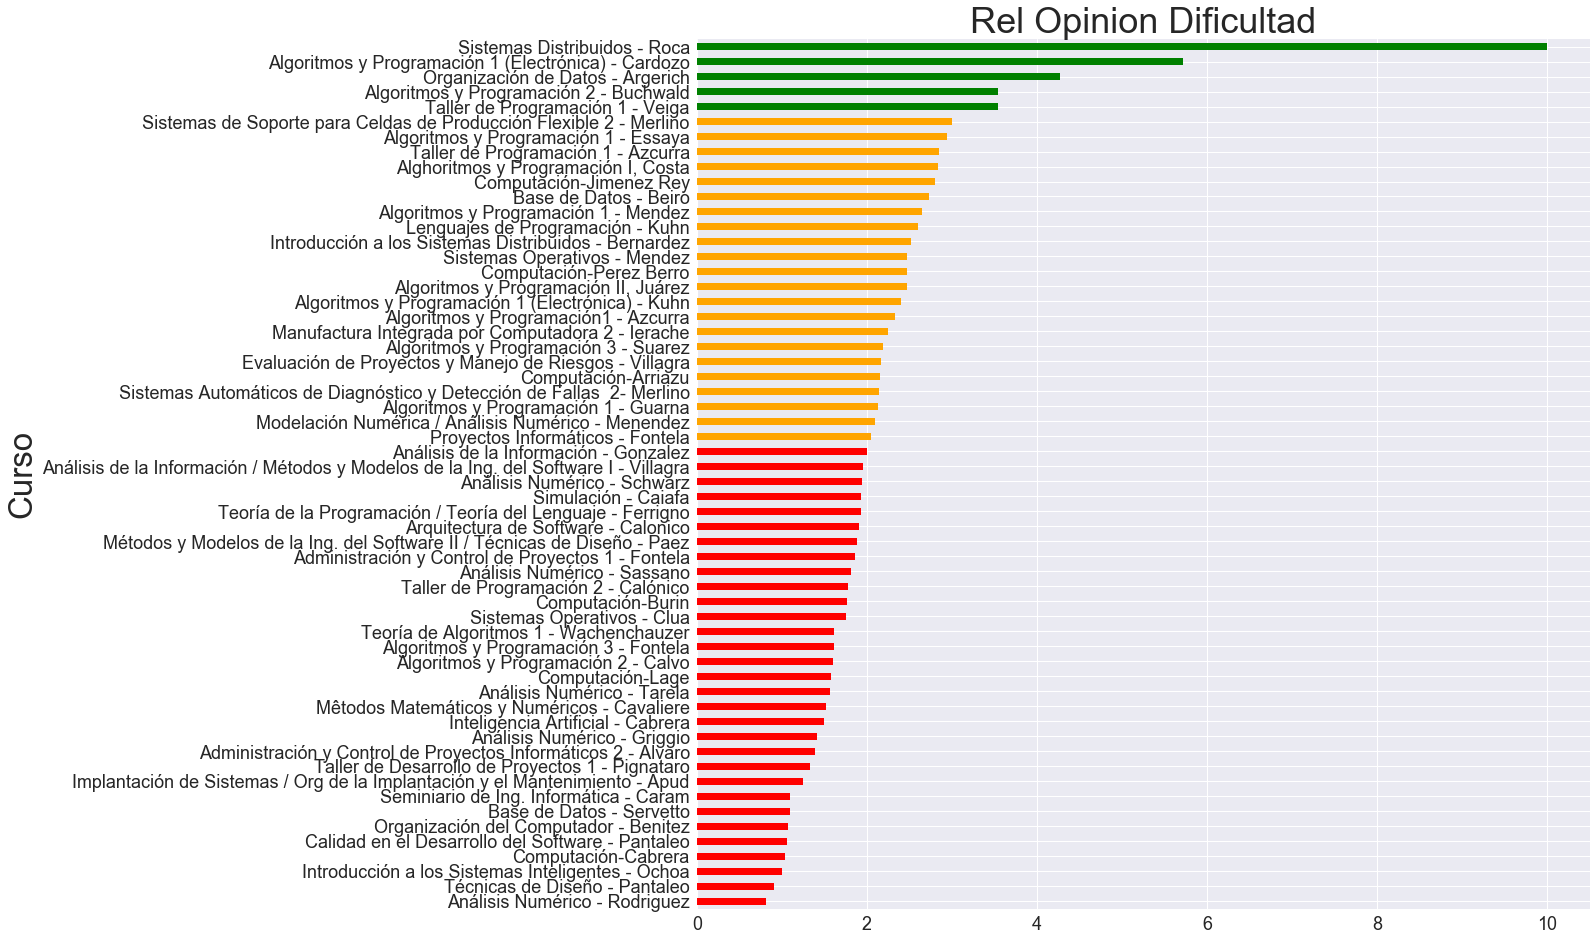

In [57]:
g_mean['Rel Opinion Dificultad'] = (g_mean['Opinión General Sobre el Curso']/(5-g_mean['Dificultad del Curso'])).sort_values()
VARIABLE = 'Rel Opinion Dificultad'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST).fillna('g')
g_mean[VARIABLE].plot(kind='barh',color = colors, figsize=(16,16),fontsize=18,title=VARIABLE);

## Correlacion Entre Variables

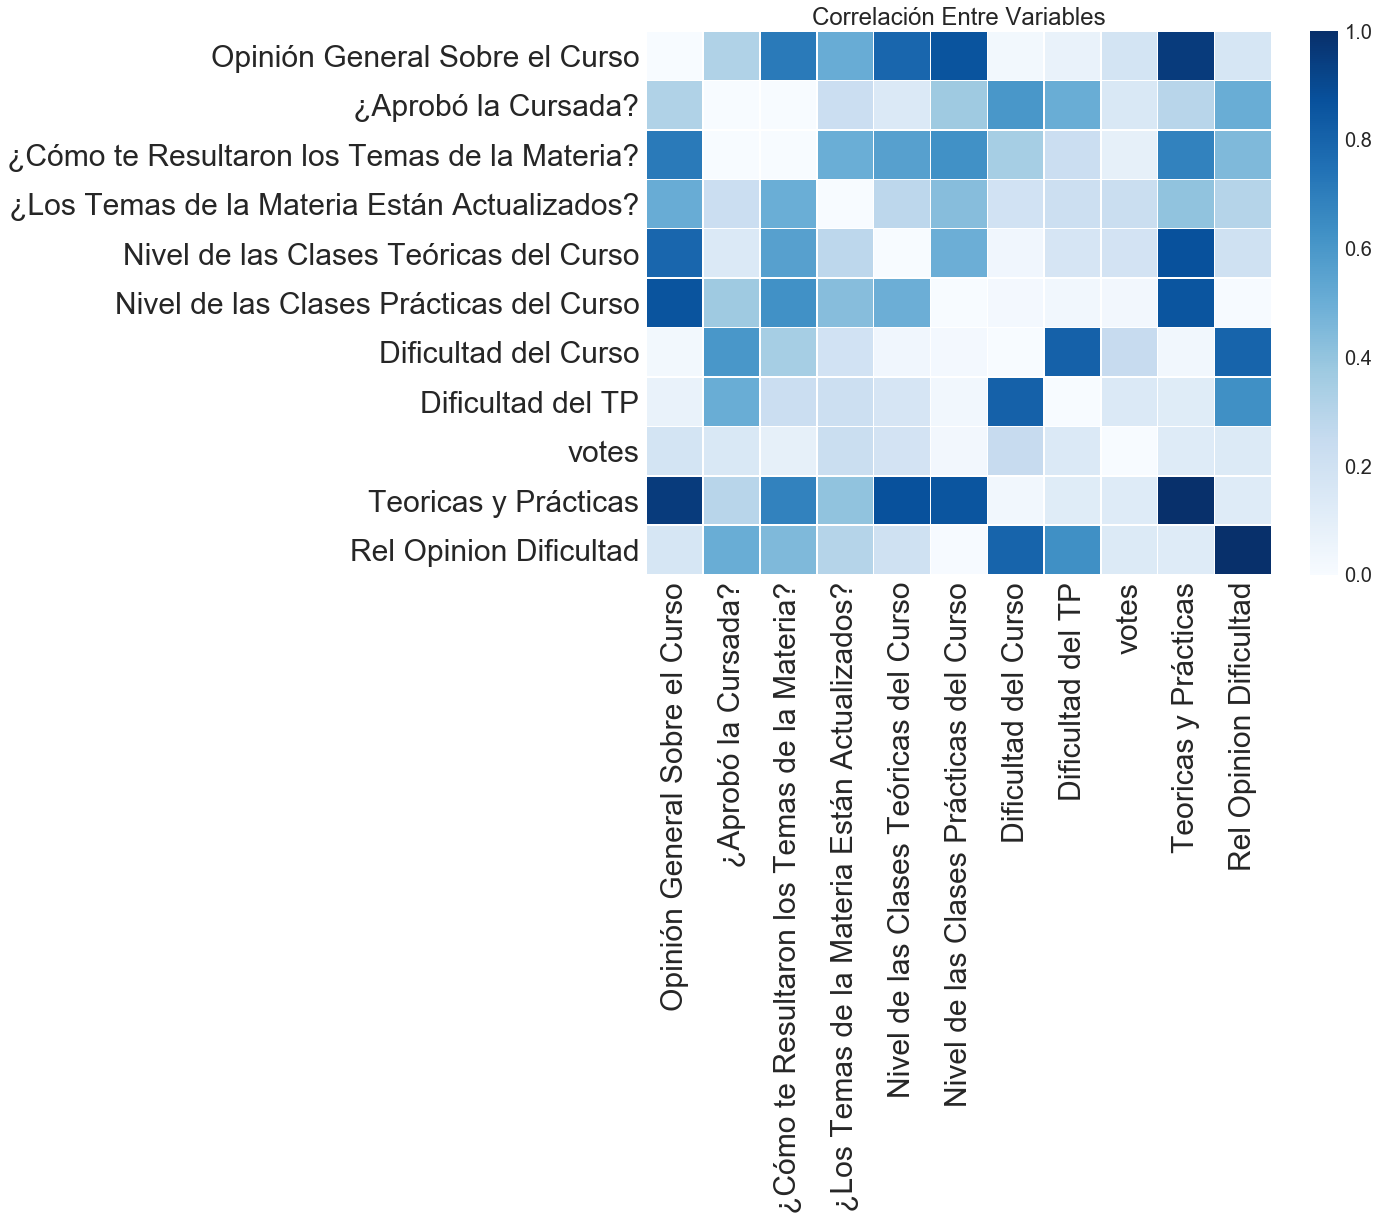

In [58]:
cor = g_mean.corr()
cor.values[[np.arange(9)]*2] = 0
cor.drop('votes',axis=1)
fig, ax = plt.subplots(figsize=(14,10))         # Sample f"igsize in inches
sns.set(font_scale=2)
sns.heatmap(cor.applymap(abs),annot=False, linewidths=.5,cmap='Blues',  ax=ax);
plt.title('Correlación Entre Variables');

## Diferencia Entre Nivel de Clases Teóricas y Prácticas
Hacia la derecha: Las clases teóricas son mejores que las prácticas.
Hacia la izquierda: Las clases prácticas son mejores que las teóricas.
En el centro: Poca o Ninguna diferencia.

In [59]:
g_mean['dif_teo_prac'] = ((g_mean['Nivel de las Clases Teóricas del Curso']-(g_mean['Nivel de las Clases Prácticas del Curso'])))

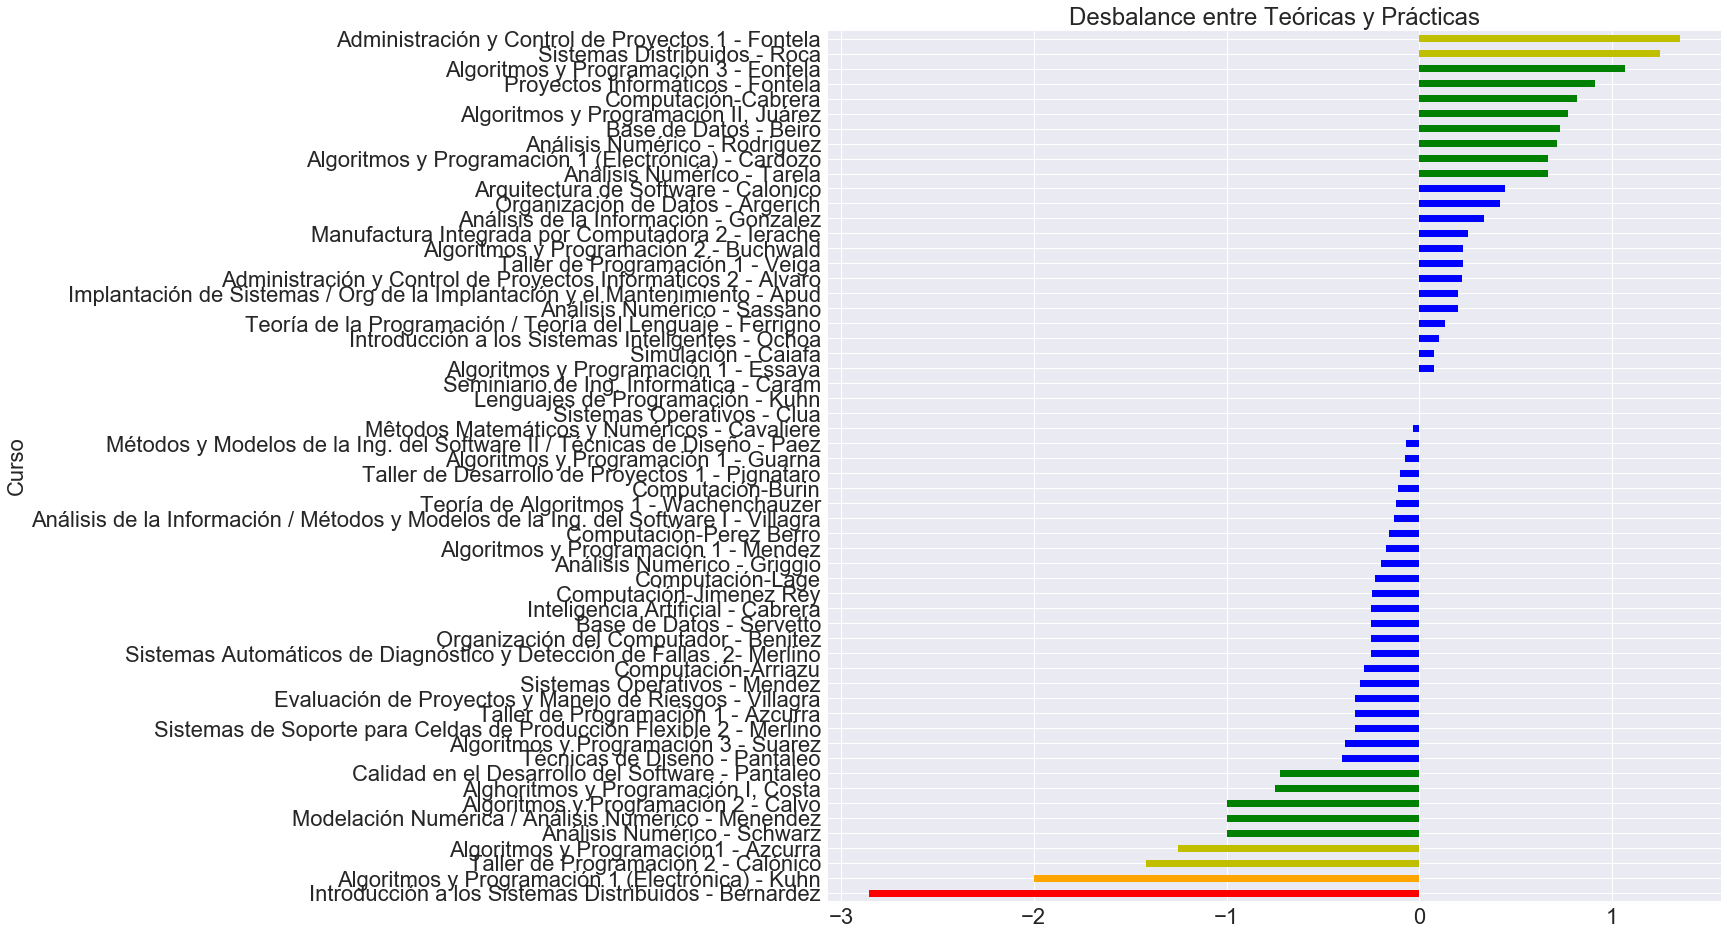

In [60]:
VARIABLE = 'dif_teo_prac'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(-abs(g_mean[VARIABLE]),5,labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title='Desbalance entre Teóricas y Prácticas');

## Promedio General por Curso

In [34]:
g_mean['general_ave'] = (g_mean['Opinión General Sobre el Curso']+g_mean['¿Cómo te Resultaron los Temas de la Materia?']+g_mean['¿Los Temas de la Materia Están Actualizados?']+g_mean['Nivel de las Clases Teóricas del Curso']+g_mean['Nivel de las Clases Prácticas del Curso']+g_mean['Dificultad del Curso'])/6

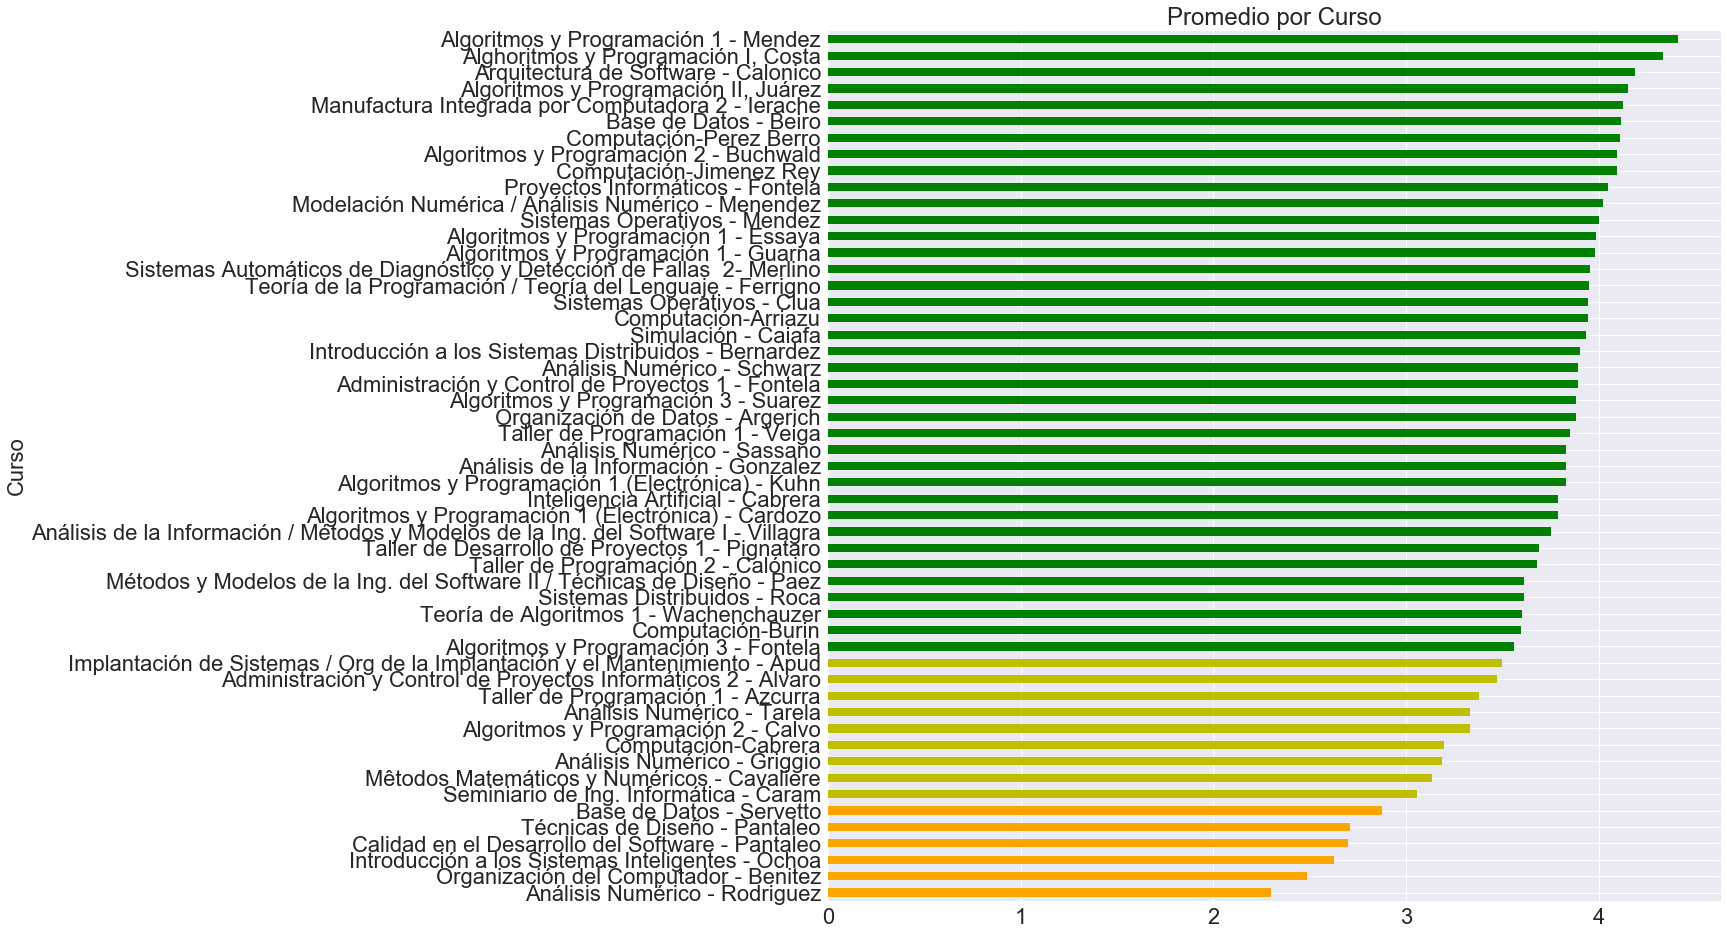

In [35]:
VARIABLE = 'general_ave'
g_mean = g_mean.sort_values(by=VARIABLE,ascending=True).dropna()
colors = pd.cut(g_mean[VARIABLE], CUTLIST, labels=LABELSLIST)
g_mean[VARIABLE].plot(kind='barh',color= colors,figsize=(16,16),fontsize=22,title="Promedio por Curso");

# Comentarios por Curso

In [29]:
pd.set_option('max_colwidth',-1)
pd.set_option('max_r',999)
comp[['Curso','Comentarios Sobre el Curso']].sort_values(by = 'Curso').dropna()

Curso  \
13   Administración y Control de Proyectos 1 - Fontela                                     
9    Administración y Control de Proyectos 1 - Fontela                                     
172  Administración y Control de Proyectos 1 - Fontela                                     
38   Administración y Control de Proyectos 1 - Fontela                                     
363  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
173  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
400  Administración y Control de Proyectos Informáticos 2 - Alvaro                         
476  Alghoritmos y Programación I, Costa                                                   
510  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
233  Algoritmos y Programación 1 (Electrónica) - Cardozo                                   
213  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
63   Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
338  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
206  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
183  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
178  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
511  Algoritmos y Programación 1 (Electrónica) - Kuhn                                      
501  Algoritmos y Programación 1 - Essaya                                                  
499  Algoritmos y Programación 1 - Essaya                                                  
64   Algoritmos y Programación 1 - Essaya                                                  
500  Algoritmos y Programación 1 - Essaya                                                  
17   Algoritmos y Programación 1 - Essaya                                                  
552  Algoritmos y Programación 1 - Guarna                                                  
168  Algoritmos y Programación 1 - Guarna                                                  
305  Algoritmos y Programación 1 - Guarna                                                  
157  Algoritmos y Programación 1 - Mendez                                                  
165  Algoritmos y Programación 1 - Mendez                                                  
154  Algoritmos y Programación 1 - Mendez                                                  
92   Algoritmos y Programación 1 - Mendez                                                  
50   Algoritmos y Programación 1 - Mendez                                                  
245  Algoritmos y Programación 1 - Mendez                                                  
75   Algoritmos y Programación 1 - Mendez                                                  
117  Algoritmos y Programación 1 - Mendez                                                  
46   Algoritmos y Programación 1 - Mendez                                                  
43   Algoritmos y Programación 1 - Mendez                                                  
240  Algoritmos y Programación 1 - Mendez                                                  
191  Algoritmos y Programación 1 - Mendez                                                  
72   Algoritmos y Programación 1 - Mendez                                                  
336  Algoritmos y Programación 2 - Buchwald                                                
343  Algoritmos y Programación 2 - Buchwald                                                
359  Algoritmos y Programación 2 - Buchwald                                                
270  Algoritmos y Programación 2 - Calvo                                                   
394  Algoritmos y Programación 2 - Calvo                                                   
145  Algoritmos y Programación 2 - 

In [30]:
comp.columns

Index(['Timestamp', 'Curso', 'Opinión General Sobre el Curso',
       '¿Aprobó la Cursada?', '¿Cómo te Resultaron los Temas de la Materia?',
       '¿Los Temas de la Materia Están Actualizados?',
       'Nivel de las Clases Teóricas del Curso',
       'Nivel de las Clases Prácticas del Curso', 'Dificultad del Curso',
       'Dificultad del TP', 'Comentarios Sobre el Curso'],
      dtype='object')

In [31]:
comp['¿Aprobó la Cursada?'] = (comp['¿Aprobó la Cursada?'] == 5)

In [32]:
comp['¿Los Temas de la Materia Están Actualizados?'] = (comp['¿Los Temas de la Materia Están Actualizados?'] == 5)

In [33]:
lista_cursos = list(comp.groupby('Curso').size().sort_values(ascending=False).keys())

# Resultados curso por curso

In [34]:
# Por curso

for curso in lista_cursos:
    chunk = comp[comp['Curso'] == curso]
    print(curso)
    print("Num votes:",len(chunk))
    print("Opinion General:",round(chunk['Opinión General Sobre el Curso'].mean(),2))
    print("Nivel de las Clases Teóricas del Curso:",round(chunk['Nivel de las Clases Teóricas del Curso'].mean(),2))
    print("Nivel de las Clases Prácticas del Curso:",round(chunk['Nivel de las Clases Prácticas del Curso'].mean(),2))
    print("Dificultad del Curso:",round(chunk['Dificultad del Curso'].mean(),2))
    print("Dificultad del TP:",round(chunk['Dificultad del TP'].mean(),2))
    print("¿Cómo te Resultaron los Temas de la Materia?:",round(chunk['¿Cómo te Resultaron los Temas de la Materia?'].mean(),2))
    print("¿Los Temas de la Materia Están Actualizados?:",round(chunk['¿Los Temas de la Materia Están Actualizados?'].mean(),2))    
    print("Aprobo la cursada:",round(chunk['¿Aprobó la Cursada?'].mean(),2))
    print("----------------------")

Computación-Perez Berro
Num votes: 39
Opinion General: 4.49
Nivel de las Clases Teóricas del Curso: 3.95
Nivel de las Clases Prácticas del Curso: 4.15
Dificultad del Curso: 3.15
Dificultad del TP: 3.28
¿Cómo te Resultaron los Temas de la Materia?: 4.1
¿Los Temas de la Materia Están Actualizados?: 0.92
Aprobo la cursada: 0.97
----------------------
Análisis de la Información / Métodos y Modelos de la Ing. del Software I - Villagra
Num votes: 30
Opinion General: 3.7
Nivel de las Clases Teóricas del Curso: 3.26
Nivel de las Clases Prácticas del Curso: 3.45
Dificultad del Curso: 2.97
Dificultad del TP: 3.23
¿Cómo te Resultaron los Temas de la Materia?: 3.93
¿Los Temas de la Materia Están Actualizados?: 1.0
Aprobo la cursada: 0.97
----------------------
Mêtodos Matemáticos y Numéricos - Cavaliere
Num votes: 29
Opinion General: 2.83
Nivel de las Clases Teóricas del Curso: 2.79
Nivel de las Clases Prácticas del Curso: 2.76
Dificultad del Curso: 3.1
Dificultad del TP: 3.48
¿Cómo te Resultaron 

# Analisis Historico

In [35]:
comp_1 = pd.read_csv('encuesta.csv')
comp_1 = map_answers(comp_1)
comp_2 = pd.read_csv('encuesta2.csv')
comp_2 = map_answers(comp_2)
comp_3 = pd.read_csv('encuesta3.csv')
comp_3 = map_answers(comp_3)
comp_4 = pd.read_csv('encuesta4.csv')
comp_4 = map_answers(comp_4)
comp_5 = pd.read_csv('encuesta5.csv')
comp_5 = map_answers(comp_5)
comp_1['cuatrimestre'] = 1
comp_2['cuatrimestre'] = 2
comp_3['cuatrimestre'] = 3
comp_4['cuatrimestre'] = 4
comp_5['cuatrimestre'] = 5

In [36]:
print(len(comp_1))
print(len(comp_2))
print(len(comp_3))
print(len(comp_4))
print(len(comp_5))

458
528
701
834
554


In [37]:
comp = comp_1.append(comp_2)
comp = comp.append(comp_3)
comp = comp.append(comp_4)
comp = comp.append(comp_5)

In [38]:
grouped = comp.groupby('cuatrimestre').mean()

In [39]:
grouped.head()

Opinión General Sobre el Curso  ¿Aprobó la Cursada?  \
cuatrimestre                                                        
1             3.299127                        4.633188              
2             3.729167                        4.613636              
3             3.691869                        4.669044              
4             3.805755                        4.683453              
5             3.759928                        4.624549              

              ¿Cómo te Resultaron los Temas de la Materia?  \
cuatrimestre                                                 
1             3.853712                                       
2             4.164773                                       
3             4.097004                                       
4             4.220624                                       
5             4.133574                                       

              ¿Los Temas de la Materia Están Actualizados?  \
cuatrimestre                                                 
1             3.751092                                       
2             4.522727                                       
3             4.457917                                       
4             4.664269                                       
5             4.631769                                       

              Nivel de las Clases Teóricas del Curso  \
cuatrimestre                                           
1             3.074419                                 
2             3.523810                                 
3             3.451183                                 
4             3.599004                                 
5             3.528864                                 

              Nivel de las Clases Prácticas del Curso  Dificultad del Curso  \
cuatrimestre                                                                  
1             3.228571                                 3.072052               
2             3.496094                                 3.278409               
3             3.514749                                 3.202568               
4             3.595771                                 3.244604               
5             3.537594                                 3.182310               

              Dificultad del TP  
cuatrimestre                     
1             3.307517           
2             3.473684           
3             3.355072           
4             3.434258           
5             3.430127

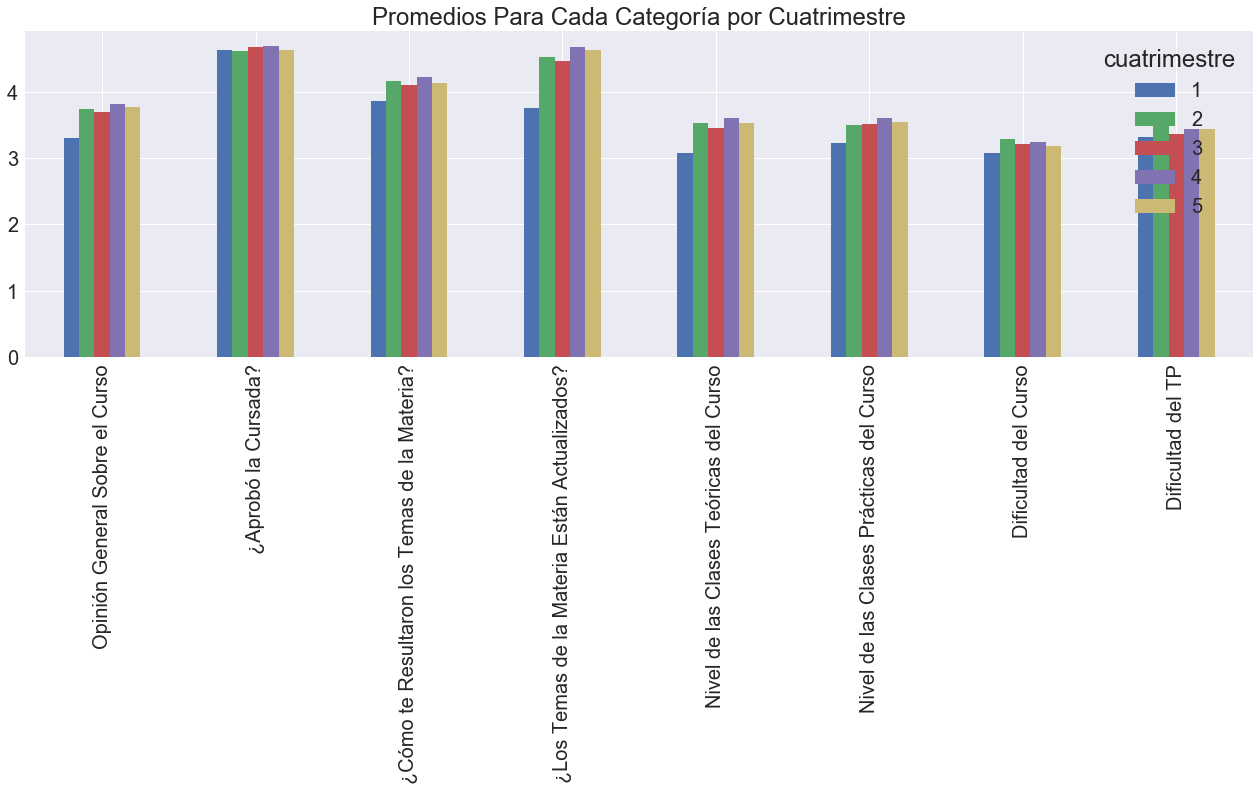

In [40]:
grouped.T.plot.bar(figsize=(22,6));
plt.title('Promedios Para Cada Categoría por Cuatrimestre');

In [41]:
lista_cursos = list(comp.groupby('Curso')['cuatrimestre'].count().sort_values(ascending = False)[0:20].index)

In [42]:
all_means = comp[comp['Curso'].isin(lista_cursos)].groupby(['Curso','cuatrimestre']).mean()

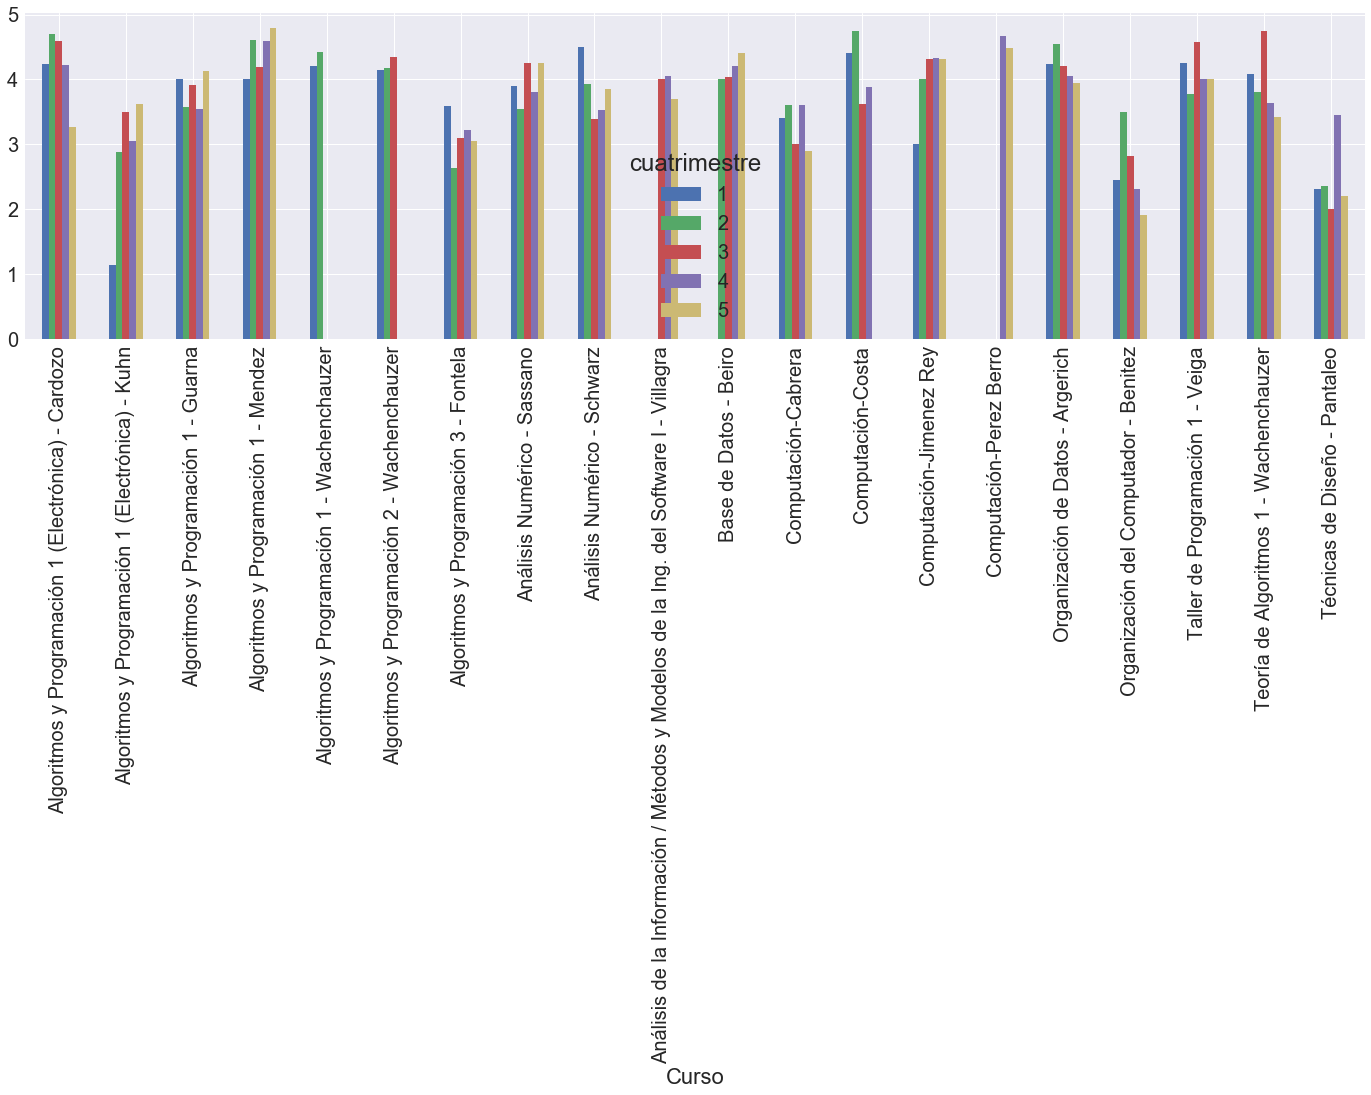

In [43]:
all_means['Opinión General Sobre el Curso'].unstack().plot.bar(figsize=(24,6));

In [44]:
lista_cursos = list(comp.groupby('Curso')['cuatrimestre'].count().sort_values(ascending = False)[21:40].index)

In [45]:
all_means = comp[comp['Curso'].isin(lista_cursos)].groupby(['Curso','cuatrimestre']).mean()

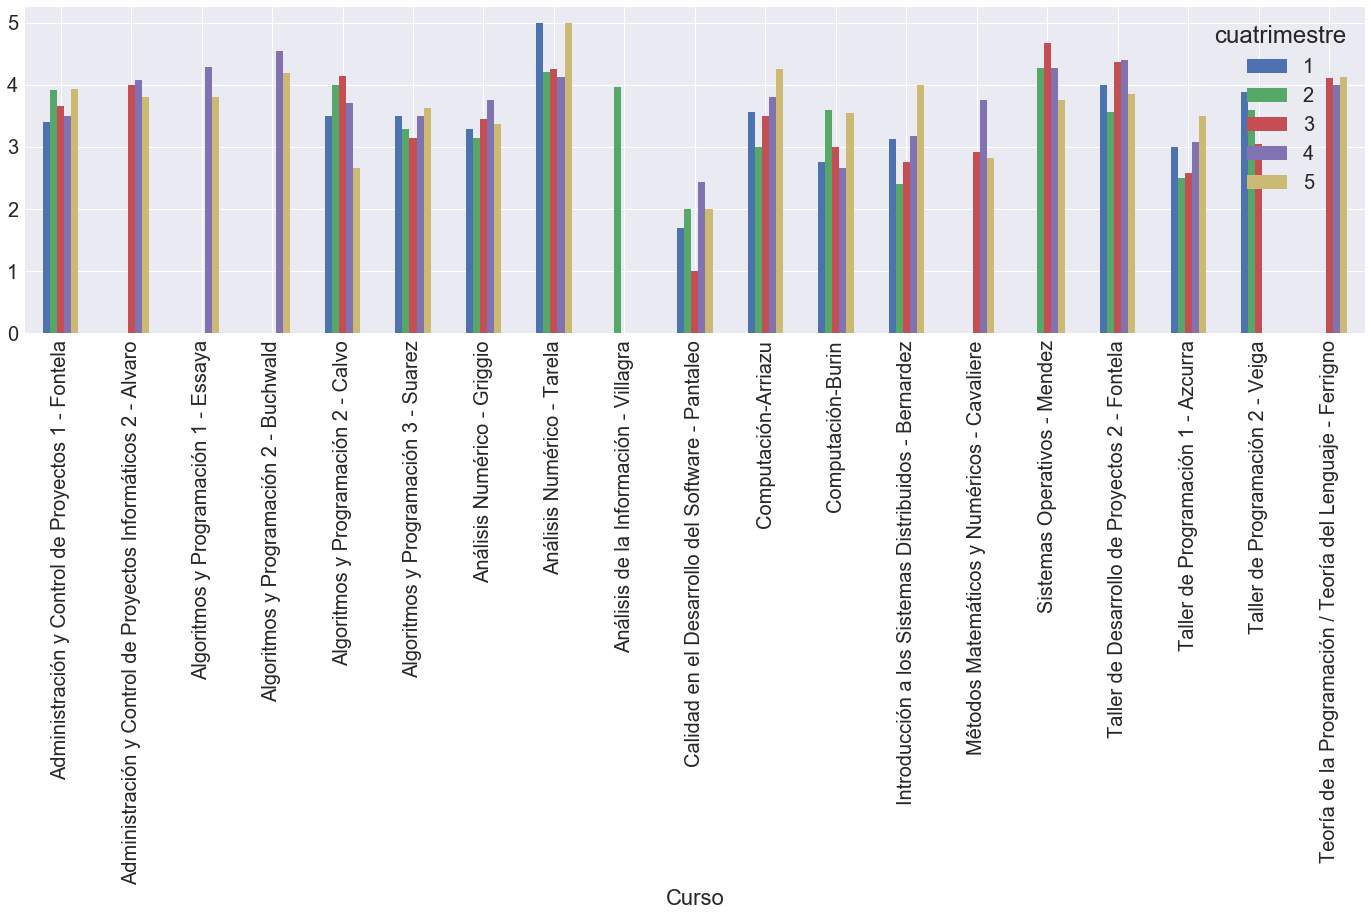

In [46]:
all_means['Opinión General Sobre el Curso'].unstack().plot.bar(figsize=(24,6));

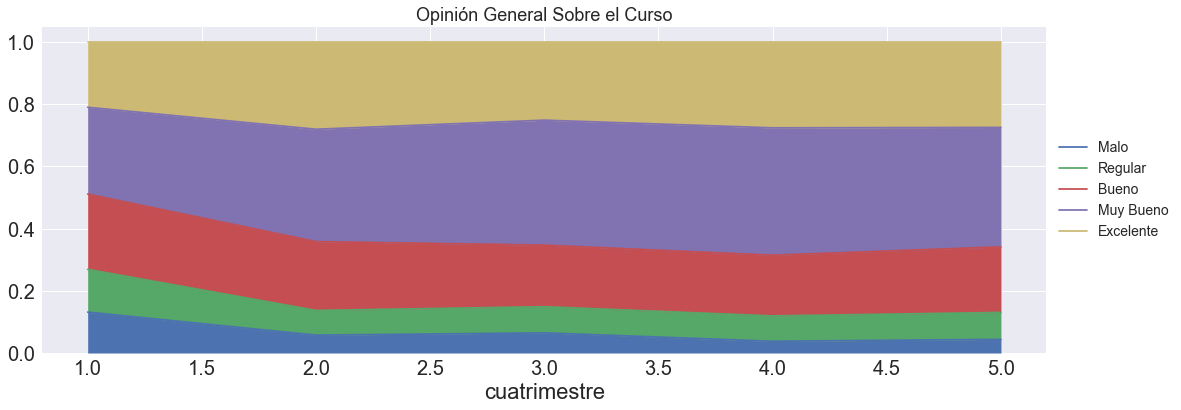

In [47]:
VARIABLE = 'Opinión General Sobre el Curso'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['Malo','Regular','Bueno','Muy Bueno','Excelente'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

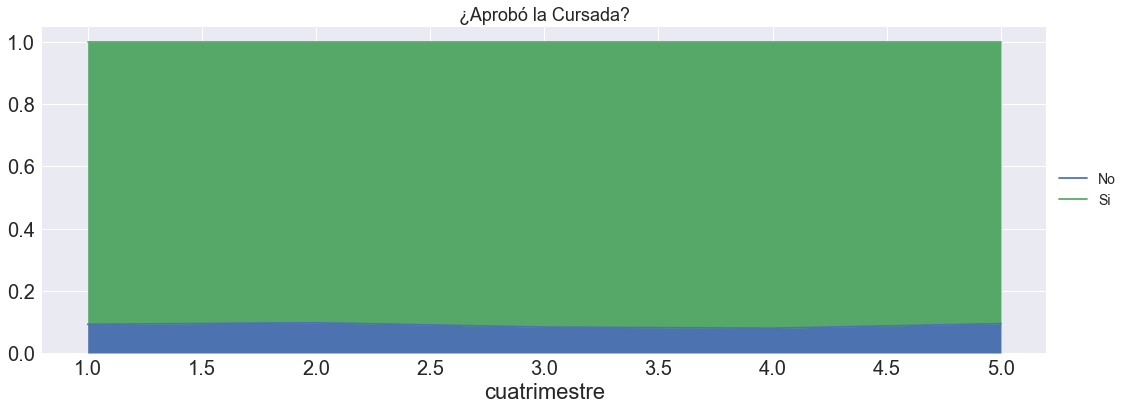

In [48]:
VARIABLE = '¿Aprobó la Cursada?'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['No','Si'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

cuatrimestre                                         1         2         3  \
¿Los Temas de la Materia Están Actualizados?                                 
1                                             0.312227  0.119318  0.135521   
5                                             0.687773  0.880682  0.864479   

cuatrimestre                                         4         5  
¿Los Temas de la Materia Están Actualizados?                      
1                                             0.083933  0.092058  
5                                             0.916067  0.907942  


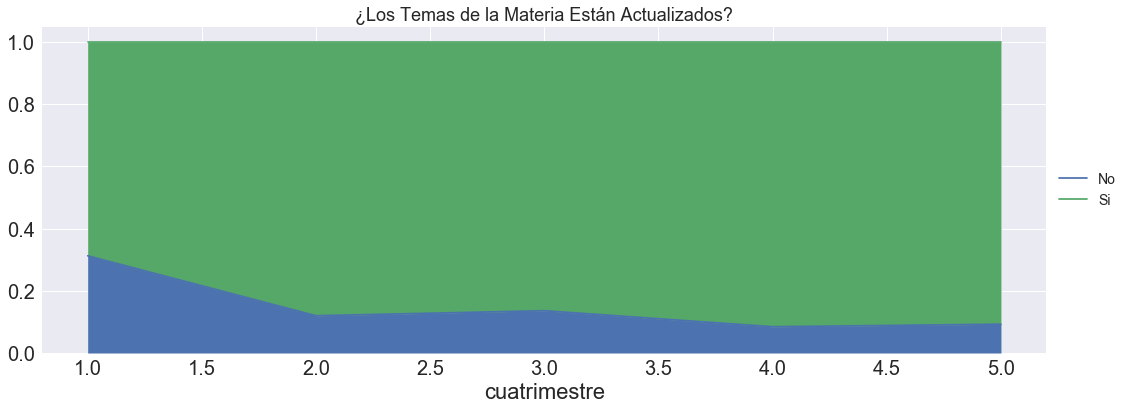

In [49]:
VARIABLE = '¿Los Temas de la Materia Están Actualizados?'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
print(area1)
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['No','Si'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);

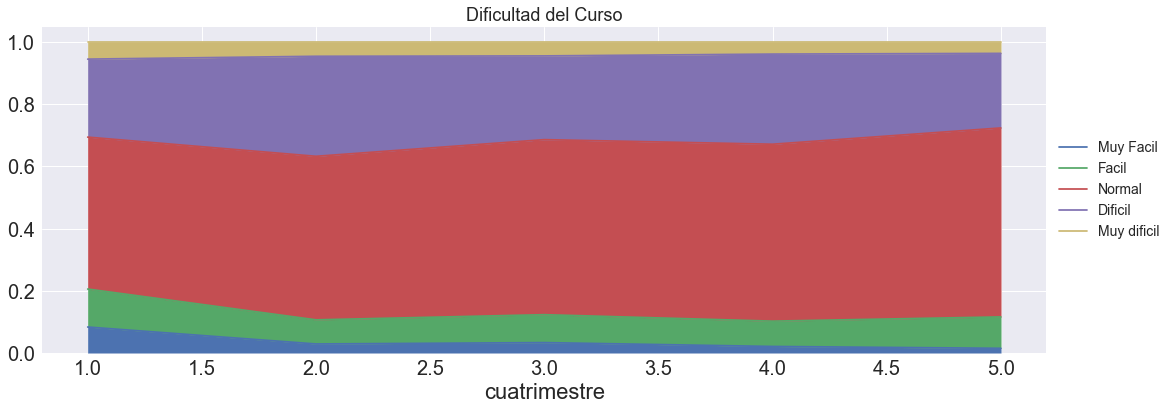

In [50]:
VARIABLE = 'Dificultad del Curso'
area1 = comp.groupby(['cuatrimestre',VARIABLE]).count()['Curso'].unstack()
area1 =(area1.T)/(area1.T.sum())
area1.T.plot.area(figsize=(18,6));
plt.title(VARIABLE, fontsize=18);
plt.legend(['Muy Facil','Facil','Normal','Dificil','Muy dificil'],loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);